# Neural Network Architectures

This is a script to compare different architectures for neural networks. We use and compare:
    
    - Pytorch
    - Tensorflow
    - Keras

## PyTorch

PyTorch is a Python based scientific computing package that is similar to NumPy, but with the added power of GPUs. It is also a deep learning framework that provides maximum flexibility and speed during implementing and building deep neural network architectures.

https://www.analyticsvidhya.com/blog/2019/01/guide-pytorch-neural-networks-case-studies/

### Library Imports

In [1]:
import torch

### Main Code

NN dimensioning

In [2]:
n_input, n_hidden, n_output = 5, 3, 1

Initialize tensor for inputs, and outputs:

Tensors are the base data structures of PyTorch which are used for building different types of neural networks. They can be considered as the generalization of arrays and matrices; in other words, tensors are N-dimensional matrices.


In [3]:
x = torch.randn((1, n_input))
y = torch.randn((1, n_output))

Initialize tensor variables for weights 

In [4]:
w1 = torch.randn(n_input, n_hidden) # weight for hidden layer
w2 = torch.randn(n_hidden, n_output) # weight for output layer

Initialize tensor variables for bias terms

In [5]:
b1 = torch.randn((1, n_hidden)) # bias for hidden layer
b2 = torch.randn((1, n_output)) # bias for output layer

After the parameter initialization step, a neural network can be defined and trained in four key steps:

    1)Forward Propagation
    2)Loss computation
    3)Backpropagation
    4)Updating the parameters

1) Forward Propagation

In [6]:
# sigmoid activation function using pytorch
def sigmoid_activation(z):
    return 1 / (1 + torch.exp(-z))

In [7]:
# activation of hidden layer 
z1 = torch.mm(x, w1) + b1
a1 = sigmoid_activation(z1)

In [8]:
# activation (output) of final layer 
z2 = torch.mm(a1, w2) + b2
output = sigmoid_activation(z2)

2) Loss computation

In [9]:
loss = y - output

3) Backpropagation

In [10]:
# function to calculate the derivative of activation (depends explicitly on activation function's functional form)
def sigmoid_delta(x):
  return x * (1 - x)

In [11]:
# compute derivative of error terms
delta_output = sigmoid_delta(output)
delta_hidden = sigmoid_delta(a1)

In [12]:
# backpass the changes to previous layers 
d_outp = loss * delta_output
loss_h = torch.mm(d_outp, w2.t())
d_hidn = loss_h * delta_hidden

4) Parameter Update

In [13]:
learning_rate = 0.1

In [14]:
#weight update
w2 += torch.mm(a1.t(), d_outp) * learning_rate
w1 += torch.mm(x.t(), d_hidn) * learning_rate

In [15]:
#bias update
b2 += d_outp.sum() * learning_rate
b1 += d_hidn.sum() * learning_rate

### Pytorch Use Case Example: MNist Handwritten Digit Classification

Get data

In [23]:
from torchvision.datasets import CIFAR10

The torchvision package provides a utility called transforms which can be used to combine different transformations together

The first transformation converts the raw data into tensor variables and the second transformation performs normalization using the below operation:

x_normalized = x-mean / std

The values 0.5 and 0.5 represent the mean and standard deviation for 3 channels: red, green, and blue.

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]

img = img / 2 + 0.5     # unnormalize 

In [25]:
from torchvision import transforms
_tasks = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

Load MNIST Dataset and apply transformations

In [26]:
cifar = CIFAR10("data", download=True, train=True, transform=_tasks)

100%|█████████▉| 170442752/170498071 [00:32<00:00, 5536746.22it/s]

Extracting data\cifar-10-python.tar.gz to data


Another excellent utility of PyTorch is DataLoader iterators which provide the ability to batch, shuffle and load the data in parallel using multiprocessing workers. For the purpose of evaluating our model, we will partition our data into training and validation sets.

In [85]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

# create training and validation split 
split = int(0.8 * len(cifar))
index_list = list(range(len(cifar)))
train_idx, valid_idx = index_list[:split], index_list[split:]

# create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)

# create iterator objects for train and valid datasets
trainloader = DataLoader(cifar, batch_size=4, sampler=tr_sampler)
validloader = DataLoader(cifar, batch_size=4, sampler=val_sampler)

Plot sample

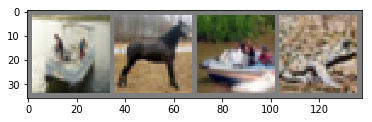

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

The neural network architectures in PyTorch can be defined in a class which inherits the properties from the base class from nn package called Module. This inheritance from the nn.Module class allows us to implement, access, and call a number of methods easily. We can define all the layers inside the constructor of the class, and the forward propagation steps inside the forward function.

We will define a network with the following layer configurations: [784, 128,10]. This configuration represents the 784 nodes (28*28 pixels) in the input layer, 128 in the hidden layer, and 10 in the output layer. Inside the forward function, we will use the sigmoid activation function in the hidden layer (which can be accessed from the nn module).

In [94]:
import torch.nn.functional as F
from torch import nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #flatten
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Model()

Define the loss function and the optimizer using the nn and optim package

In [95]:
from torch import optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)

Model Training

In [89]:
for epoch in range(1, 11): ## run the model for 10 epochs
    train_loss, valid_loss = [], []
    
    ## training part 
    model.train()
    for data, target in trainloader:
        optimizer.zero_grad()
        
        ## 1. forward propagation
        output = model(data)
        
        ## 2. loss calculation
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        train_loss.append(loss.item())
        
    ## evaluation part 
    model.eval()
    for data, target in validloader:
        output = model(data)
        loss = loss_function(output, target)
        valid_loss.append(loss.item())
        
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss), "Valid Loss: ", np.mean(valid_loss))


Epoch: 1 Training Loss:  1.9637894523978234 Valid Loss:  1.9127226159095765
Epoch: 2 Training Loss:  1.9543207655549049 Valid Loss:  1.972739426755905
Epoch: 3 Training Loss:  1.9765409206748008 Valid Loss:  1.9493701055526733


KeyboardInterrupt: 

Parallel Processing

In [102]:
import torch.multiprocessing as mp

def train(model):
    for data, target in trainloader:
        optimizer.zero_grad()
        ## 1. forward propagation
        output = model(data)
        
        ## 2. loss calculation
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        optimizer.step()  # This will update the shared parameters
      
    
model.share_memory() # Required for 'fork' method to work
processes = []
for i in range(2): # No. of processes
    p = mp.Process(target=train, args=(model,))
    p.start()
    processes.append(p)
for p in processes: 
    p.join()

Using Tensorboard interface

In [ ]:
!pip install tb-nightly
#!conda install -c anaconda protobuf
#!conda install future

In [108]:
!tensorboard --logdir=runs
from torch.utils.tensorboard import SummaryWriter

SyntaxError: can't assign to operator (<ipython-input-108-86d0577585e9>, line 1)

Once the model is trained, make the predictions on the validation data.

In [97]:
## dataloader for validation dataset 
dataiter = iter(validloader)
data, labels = dataiter.next()
output = model(data)

In [98]:
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())

In [99]:
print ("Actual:", labels[:10])
print ("Predicted:", preds[:10])

Actual: tensor([3, 1, 8, 5])
Predicted: [9 9 9 9]
